In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gai shi dao wang,1969


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 15
Maya                    12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Othello                 11
Anna Karenina           10
Temptation              10
Name: title, dtype: int64

In [6]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1203
1936    1143
1938    1140
Name: year, dtype: int64

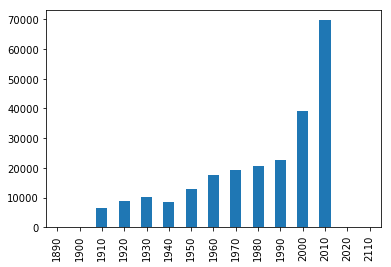

In [7]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

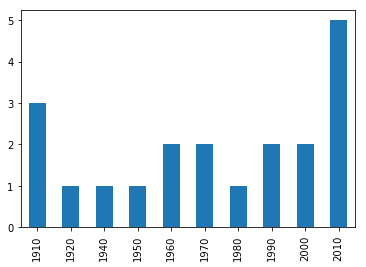

In [8]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

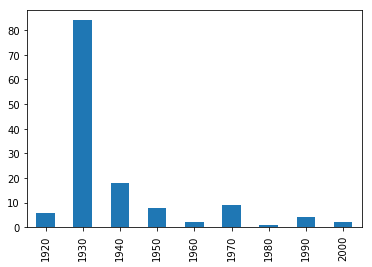

In [9]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

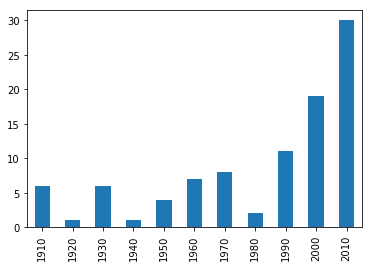

In [10]:
# Plot the number of "Hamlet" characters each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [11]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        20746
Dancer         12263
Extra          11645
Reporter        8342
Doctor          7592
Student         7577
Party Guest     7062
Policeman       6992
Nurse           6825
Bartender       6751
Herself         6557
Name: character, dtype: int64

In [12]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II    12
Joyce Brothers         9
Mary Jo Pehl           9
Laura (II) M?gica      9
Margaret Thatcher      9
In?s J. Southern       8
Estrella Borja         8
Marta Berrocal         8
Marina Revilla         8
Elena Santisteban      7
Name: name, dtype: int64

In [13]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler          99
Richard Nixon         46
Ronald Reagan         40
John F. Kennedy       36
George W. Bush        25
Ron Jeremy            23
Winston Churchill     23
Martin Luther King    22
Bill Clinton          22
Benito Mussolini      22
Name: name, dtype: int64

In [14]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     32
Bess Flowers        29
Harold Miller       29
Nolan Leary         27
Frank O'Connor      27
Franklyn Farnum     27
Larry Steers        25
Charles Sullivan    24
Pierre Watkin       24
Name: name, dtype: int64

In [15]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Raj Babbar       15
Aruna Irani      15
Lou Scheimer     15
Mohanlal         15
Deven Verma      13
Asrani           13
Om Shivpuri      13
Name: name, dtype: int64

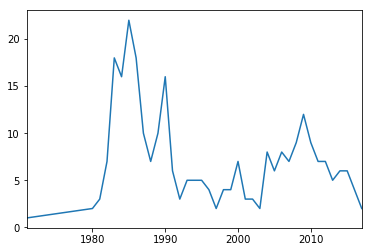

In [16]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [17]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Coffee Shop            2
Name: character, dtype: int64

In [18]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Reporter         5
Science Promo Cadet      5
Science Fair Judge       5
Science Kid              5
Science Club Member      5
Science                  4
Science Fair Kid         4
Name: character, dtype: int64

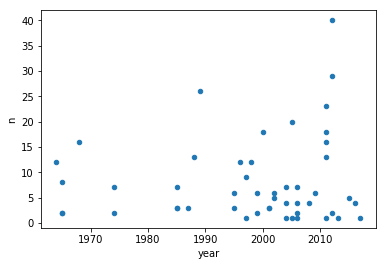

In [19]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

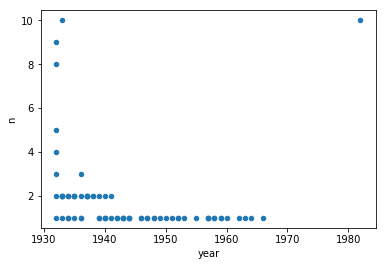

In [20]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

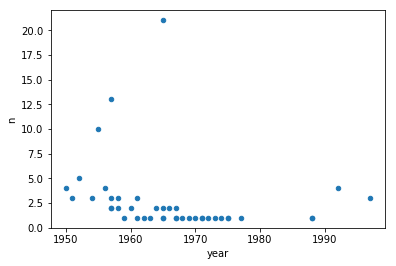

In [21]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [22]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6695
actress    3004
Name: type, dtype: int64

In [23]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      4622
actress    4608
Name: type, dtype: int64